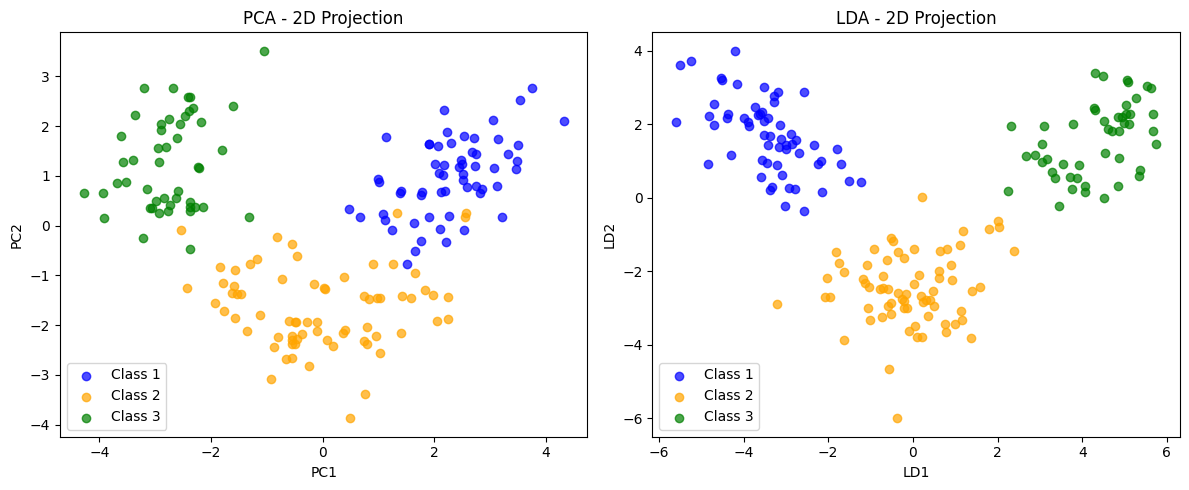

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 1. Read input CSV file
filename = "wine.csv"
df = pd.read_csv(filename)

# 2. Separate features and target
X = df.drop(columns=['Wine'])   # feature columns (13 features)
y = df['Wine']                  # target column

# 3. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Apply PCA (2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 5. Apply LDA (2 components)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# 6. Define colors for classes
colors = {1: 'blue', 2: 'orange', 3: 'green'}

# 7. Plot PCA 2D projection
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for cls in y.unique():
    plt.scatter(
        X_pca[y == cls, 0],
        X_pca[y == cls, 1],
        color=colors[cls],
        label=f'Class {cls}',
        alpha=0.7
    )
plt.title("PCA - 2D Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()

# 8. Plot LDA 2D projection
plt.subplot(1, 2, 2)
for cls in y.unique():
    plt.scatter(
        X_lda[y == cls, 0],
        X_lda[y == cls, 1],
        color=colors[cls],
        label=f'Class {cls}',
        alpha=0.7
    )
plt.title("LDA - 2D Projection")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()

plt.tight_layout()
plt.show()
